In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [88]:
df = pd.read_csv('iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')

/tmp/ipykernel_24248/160800246.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')


In [89]:
len(df.columns)

286

In [90]:
df

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,3313528,6492674,3202134,3290540,14736111,7398617,7337494,33885546,15142976,8139094,7003882,95.25,31755284,83663440,10321914,10047365,4969883,5077482,10764379,5311288,5453091,10943540,5389280,5554260,10806690,5344540,5462150,10422095,5256211,5165884,9993001,5131597,4861404,9420827,4893101,4527726,9020276,4688746,4331530,8503586,4441282,4062304,7942413,4130069,3812344,7037532,3705369,3332163,5695958,3002982,2692976,4821062,2563200,2257862,3645077,1938227,1706850,2647340,1413848,1233492,1814582,966684,847898,1175364,651552,523812,1039551,605583,433968,2.09,102724322,52519974,50204348,21611963,11222300,10389663,111075594,57288776,53786818,3807844,1889986,1917858,7364645,3783447,3581198,865972,547528,318444,6423548,3198595,3224953,7177185,785361,6317027,11800247,2576213,1297617,1278596,6179890,2939986,2691338,945162,1350802,1168098,1149257,13934448,4365234,8974853,864662,2900108,673540,26

In [91]:
df['NOM_ENT'].unique()

array(['Total nacional', 'Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [92]:
df[df['NOM_ENT'] == 'Ciudad de México']

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [93]:
df.columns

Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC'],
      dtype='object', length=286)

In [94]:
df['ENTIDAD'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [95]:
df_cdmx = df[df['NOM_ENT'] == 'Ciudad de México'].copy()

In [96]:
df_cdmx

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [97]:
pd.set_option('display.max_rows', None)
df_cdmx.isna().sum()

ENTIDAD         0
NOM_ENT         0
MUN             0
NOM_MUN         0
LOC             0
NOM_LOC         0
LONGITUD       32
LATITUD        32
ALTITUD        32
POBTOT          0
POBFEM          0
POBMAS          0
P_0A2           0
P_0A2_F         0
P_0A2_M         0
P_3YMAS         0
P_3YMAS_F       0
P_3YMAS_M       0
P_5YMAS         0
P_5YMAS_F       0
P_5YMAS_M       0
P_12YMAS        0
P_12YMAS_F      0
P_12YMAS_M      0
P_15YMAS        0
P_15YMAS_F      0
P_15YMAS_M      0
P_18YMAS        0
P_18YMAS_F      0
P_18YMAS_M      0
P_3A5           0
P_3A5_F         0
P_3A5_M         0
P_6A11          0
P_6A11_F        0
P_6A11_M        0
P_8A14          0
P_8A14_F        0
P_8A14_M        0
P_12A14         0
P_12A14_F       0
P_12A14_M       0
P_15A17         0
P_15A17_F       0
P_15A17_M       0
P_18A24         0
P_18A24_F       0
P_18A24_M       0
P_15A49_F       0
P_60YMAS        0
P_60YMAS_F      0
P_60YMAS_M      0
REL_H_M         0
POB0_14         0
POB15_64        0
POB65_MAS 

In [98]:
pd.reset_option('display.max_rows')

In [99]:
df_cdmx.head(30)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [100]:
df_cdmx_fil = df_cdmx[df_cdmx['LOC'] == 0].copy()

In [101]:
df_cdmx_fil

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [102]:
df_cdmx_fil = df_cdmx_fil.dropna(axis = 1)

In [103]:
df_cdmx_fil

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444,73765,33679,162484,96369,66115,27782

In [104]:
df_cdmx_fil['PRO_OCUP_C']

52272     0.8
52275    0.77
52277     0.7
52279    0.81
52306    0.83
52308    0.82
52310    0.92
52312    0.87
52338    1.03
52585    0.81
52594    0.93
52649    0.81
52816    0.91
52930    0.56
52932    0.72
52934    0.66
52936    0.82
Name: PRO_OCUP_C, dtype: object

#### La marginalidad se refiere a la situación social de individuos o grupos que viven al margen de la sociedad dominante. Se caracteriza por la falta de participación en los beneficios, recursos y redes de decisión sociales

Por esto nos enfocamos en elegir las caracteristicas que contemplen falta de recursoso como agua, drenaje, seguro social, educacion, vivienda. 

In [105]:
lst_var = [
    'NOM_MUN',
    'POBTOT',
    "P3YM_HLI",
    "P3A5_NOA",
    "P6A11_NOA",
    "P12A14NOA",
    "P15A17A",
    "P18A24A",
    "P8A14AN",
    "P15YM_AN",
    "P15YM_SE",
    "P15PRI_IN",
    "P15SEC_IN",
    "P18YM_PB",
    "GRAPROES",
    "POCUPADA",
    "PSINDER",
    "PROM_OCUP",
    "PRO_OCUP_C",
    'VIVTOT',
    "VPH_PISOTI",
    "VPH_1DOR",
    "VPH_1CUART",
    "VPH_S_ELEC",
    "VPH_AGUAFV",
    "VPH_LETR",
    "VPH_NODREN",
    "VPH_NDEAED",
    "VPH_NDACMM",
    "VPH_SNBIEN",
    "VPH_SINRTV",
    "VPH_SINLTC",
    "VPH_SINCINT",
    "VPH_SINTIC"
]


In [106]:
lst_pob = [
    "P3YM_HLI",
    "P3A5_NOA",
    "P6A11_NOA",
    "P12A14NOA",
    "P15A17A",
    "P18A24A",
    "P8A14AN",
    "P15YM_AN",
    "P15YM_SE",
    "P15PRI_IN",
    "P15SEC_IN",
    "P18YM_PB",
    "POCUPADA",
    "PSINDER"
]

In [107]:
lst_viv = [
    "VPH_PISOTI",
    "VPH_1DOR",
    "VPH_1CUART",
    "VPH_S_ELEC",
    "VPH_AGUAFV",
    "VPH_LETR",
    "VPH_NODREN",
    "VPH_NDEAED",
    "VPH_NDACMM",
    "VPH_SNBIEN",
    "VPH_SINRTV",
    "VPH_SINLTC",
    "VPH_SINCINT",
    "VPH_SINTIC"
]

In [108]:
df_ind = df_cdmx_fil[lst_var].copy()

In [109]:
pd.set_option('display.max_columns', None)

In [110]:
df_ind # Dataframe con las variables que seleccionamos para el inidice de marginalidad

,NOM_MUN,POBTOT,P3YM_HLI,P3A5_NOA,P6A11_NOA,P12A14NOA,P15A17A,P18A24A,P8A14AN,P15YM_AN,P15YM_SE,P15PRI_IN,P15SEC_IN,P18YM_PB,GRAPROES,POCUPADA,PSINDER,PROM_OCUP,PRO_OCUP_C,VIVTOT,VPH_PISOTI,VPH_1DOR,VPH_1CUART,VPH_S_ELEC,VPH_AGUAFV,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
52272,Total de la entidad Ciudad de México,9209944,125153,90729,31704,23905,307359,446846,11841,107444,162484,277823,195837,4516388,11.48,4985469,2502789,3.32,0.8,3036239,16199,813453,136682,1917,29004,4975,4207,175,1385629,6180,46172,77272,561128,10528
52275,Azcapotzalco,432205,3208,3278,1475,969,13779,21840,386,3675,4863,10863,7539,234812,11.91,232719,90370,3.21,0.77,149381,334,37763,3888,38,239,45,87,2,65802,188,1661,2869,22687,322
52277,Coyoacán,614447,7728,3734,1698,1243,19112,34728,551,5765,8086,14199,9614,361934,12.51,331549,160961,3.2,0.7,208024,450,46621,8052,61,133,51,182,2,77944,268,2893,3506,27008,443
52279,Cuajimalpa de Morelos,217686,2046,2613,1038,669,7966,11086,348,2575,3852,7000,4773,98758,11.44,117358,52803,3.6,0.81,65831,591,17170,3004,31,285,201,137,0,25604,96,914,1675,11961,180
52306,Gustavo A. Madero,1173351,14196,12505,3808,2841,40377,59858,1364,14594,25271,37534,24464,550594,11.11,603239,300902,3.42,0.83,370297,1466,104435,15782,160,755,139,298,11,187544,847,5779,11780,79559,1523
52308,Iztacalco,404695,4412,3136,1091,816,13522,20178,418,3880,5380,11147,8181,207362,11.52,219405,110116,3.43,0.82,130175,282,31878,4820,52,93,22,42,3,61172,196,1568,2666,21763,322
52310,Iztapalapa,1835486,28716,24183,7206,5831,66351,81960,3065,26774,46418,69624,46664,742921,10.42,963957,594796,3.61,0.92,537596,2872,153423,33976,300,1278,374,327,19,290895,1500,9371,18791,132846,2489
52312,La Magdalena Contreras,247622,2890,2472,823,651,8717,11521,333,3733,5200,8844,6702,105380,10.84,129358,68100,3.62,0.87,71545,618,20505,4181,76,802,129,231,3,35003,190,1029,2064,14893,308
52338,Milpa Alta,152685,4891,2193,498,488,6096,6818,352,3219,3651,5921,3880,50781,9.95,82107,46029,3.9,1.03,44823,1027,14070,3884,151,4107,817,605,33,22489,274,1061,2683,17031,395
52585,Álvaro Obregón,759137,8492,7306,2996,2176,25548,36371,1007,9756,14621,25305,16986,355490,11.28,413437,187340,3.45,0.81,236129,1153,65965,10835,74,417,95,220,3,104217,435,3120,5739,41663,755


In [111]:
df_ind.dtypes

NOM_MUN        object
POBTOT          int64
P3YM_HLI       object
P3A5_NOA       object
P6A11_NOA      object
P12A14NOA      object
P15A17A        object
P18A24A        object
P8A14AN        object
P15YM_AN       object
P15YM_SE       object
P15PRI_IN      object
P15SEC_IN      object
P18YM_PB       object
GRAPROES       object
POCUPADA       object
PSINDER        object
PROM_OCUP      object
PRO_OCUP_C     object
VIVTOT          int64
VPH_PISOTI     object
VPH_1DOR       object
VPH_1CUART     object
VPH_S_ELEC     object
VPH_AGUAFV     object
VPH_LETR       object
VPH_NODREN     object
VPH_NDEAED     object
VPH_NDACMM     object
VPH_SNBIEN     object
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
dtype: object

In [112]:
for v in lst_viv:
    df_ind[v] = pd.to_numeric(df_ind[v])
    df_ind['Tasa_'+v] = df_ind[v]/df_ind['VIVTOT']

In [113]:
for v in lst_pob:
    df_ind[v] = pd.to_numeric(df_ind[v])
    df_ind['Tasa_'+v] = df_ind[v]/df['POBTOT']

In [114]:
df_ind

,NOM_MUN,POBTOT,P3YM_HLI,P3A5_NOA,P6A11_NOA,P12A14NOA,P15A17A,P18A24A,P8A14AN,P15YM_AN,P15YM_SE,P15PRI_IN,P15SEC_IN,P18YM_PB,GRAPROES,POCUPADA,PSINDER,PROM_OCUP,PRO_OCUP_C,VIVTOT,VPH_PISOTI,VPH_1DOR,VPH_1CUART,VPH_S_ELEC,VPH_AGUAFV,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,Tasa_VPH_PISOTI,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_LETR,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_NDACMM,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SINTIC,Tasa_P3YM_HLI,Tasa_P3A5_NOA,Tasa_P6A11_NOA,Tasa_P12A14NOA,Tasa_P15A17A,Tasa_P18A24A,Tasa_P8A14AN,Tasa_P15YM_AN,Tasa_P15YM_SE,Tasa_P15PRI_IN,Tasa_P15SEC_IN,Tasa_P18YM_PB,Tasa_POCUPADA,Tasa_PSINDER
52272,Total de la entidad Ciudad de México,9209944,125153,90729,31704,23905,307359,446846,11841,107444,162484,277823,195837,4516388,11.48,4985469,2502789,3.32,0.8,3036239,16199,813453,136682,1917,29004,4975,4207,175,1385629,6180,46172,77272,561128,10528,0.005335,0.267915,0.045017,0.000631,0.009553,0.001639,0.001386,0.000058,0.456364,0.002035,0.015207,0.025450,0.184810,0.003467,0.013589,0.009851,0.003442,0.002596,0.033373,0.048518,0.001286,0.011666,0.017642,0.030166,0.021264,0.490382,0.541314,0.271749
52275,Azcapotzalco,432205,3208,3278,1475,969,13779,21840,386,3675,4863,10863,7539,234812,11.91,232719,90370,3.21,0.77,149381,334,37763,3888,38,239,45,87,2,65802,188,1661,2869,22687,322,0.002236,0.252797,0.026027,0.000254,0.001600,0.000301,0.000582,0.000013,0.440498,0.001259,0.011119,0.019206,0.151873,0.002156,0.007422,0.007584,0.003413,0.002242,0.031881,0.050532,0.000893,0.008503,0.011252,0.025134,0.017443,0.543288,0.538446,0.209091
52277,Coyoacán,614447,7728,3734,1698,1243,19112,34728,551,5765,8086,14199,9614,361934,12.51,331549,160961,3.2,0.7,208024,450,46621,8052,61,133,51,182,2,77944,268,2893,3506,27008,443,0.002163,0.224114,0.038707,0.000293,0.000639,0.000245,0.000875,0.000010,0.374688,0.001288,0.013907,0.016854,0.129831,0.002130,0.012577,0.006077,0.002763,0.002023,0.031104,0.056519,0.000897,0.009382,0.013160,0.023109,0.015647,0.589040,0.539589,0.261961
52279,Cuajimalpa de Morelos,217686,2046,2613,1038,669,7966,11086,348,2575,3852,7000,4773,98758,11.44,117358,52803,3.6,0.81,65831,591,17170,3004,31,285,201,137,0,25604,96,914,1675,11961,180,0.008978,0.260819,0.045632,0.000471,0.004329,0.003053,0.002081,0.000000,0.388935,0.001458,0.013884,0.025444,0.181693,0.002734,0.009399,0.012004,0.004768,0.003073,0.036594,0.050927,0.001599,0.011829,0.017695,0.032156,0.021926,0.453672,0.539116,0.242565
52306,Gustavo A. Madero,1173351,14196,12505,3808,2841,40377,59858,1364,14594,25271,37534,24464,550594,11.11,603239,300902,3.42,0.83,370297,1466,104435,15782,160,755,139,298,11,187544,847,5779,11780,79559,1523,0.003959,0.282030,0.042620,0.000432,0.002039,0.000375,0.000805,0.000030,0.506469,0.002287,0.015606,0.031812,0.214852,0.004113,0.012099,0.010658,0.003245,0.002421,0.034412,0.051015,0.001162,0.012438,0.021537,0.031989,0.020850,0.469249,0.514116,0.256447
52308,Iztacalco,404695,4412,3136,1091,816,13522,20178,418,3880,5380,11147,8181,207362,11.52,219405,110116,3.43,0.82,130175,282,31878,4820,52,93,22,42,3,61172,196,1568,2666,21763,322,0.002166,0.244886,0.037027,0.000399,0.000714,0.000169,0.000323,0.000023,0.469921,0.001506,0.012045,0.020480,0.167183,0.002474,0.010902,0.007749,0.002696,0.002016,0.033413,0.049860,0.001033,0.009587,0.013294,0.027544,0.020215,0.512391,0.542149,0.272096
52310,Iztapalapa,1835486,28716,24183,7206,5831,66351,81960,3065,26774,46418,69624,46664,742921,10.42,963957,594796,3.61,0.92,537596,2872,153423,33976,300,1278,374,327,19,290895,1500,9371,18791,132846,2489,0.005342,0.285387,0.063200,0.000558,0.002377,0.000696,0.000608,0.000035,0.541103,0.002790,0.017431,0.034954,0.247111,0.004630,0.015645,0.013175,0.003926,0.003177,0.036149,0.044653,0.001670,0.014587,0.025289,0.037932,0.025423,0.404754,0.525178,0.324054
52312,La Magdalena Contreras,247622,2890,2472,823,651,8717,11521,333,3733,5200,8844

In [115]:
df_ind.columns

Index(['NOM_MUN', 'POBTOT', 'P3YM_HLI', 'P3A5_NOA', 'P6A11_NOA', 'P12A14NOA',
       'P15A17A', 'P18A24A', 'P8A14AN', 'P15YM_AN', 'P15YM_SE', 'P15PRI_IN',
       'P15SEC_IN', 'P18YM_PB', 'GRAPROES', 'POCUPADA', 'PSINDER', 'PROM_OCUP',
       'PRO_OCUP_C', 'VIVTOT', 'VPH_PISOTI', 'VPH_1DOR', 'VPH_1CUART',
       'VPH_S_ELEC', 'VPH_AGUAFV', 'VPH_LETR', 'VPH_NODREN', 'VPH_NDEAED',
       'VPH_NDACMM', 'VPH_SNBIEN', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT',
       'VPH_SINTIC', 'Tasa_VPH_PISOTI', 'Tasa_VPH_1DOR', 'Tasa_VPH_1CUART',
       'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV', 'Tasa_VPH_LETR',
       'Tasa_VPH_NODREN', 'Tasa_VPH_NDEAED', 'Tasa_VPH_NDACMM',
       'Tasa_VPH_SNBIEN', 'Tasa_VPH_SINRTV', 'Tasa_VPH_SINLTC',
       'Tasa_VPH_SINCINT', 'Tasa_VPH_SINTIC', 'Tasa_P3YM_HLI', 'Tasa_P3A5_NOA',
       'Tasa_P6A11_NOA', 'Tasa_P12A14NOA', 'Tasa_P15A17A', 'Tasa_P18A24A',
       'Tasa_P8A14AN', 'Tasa_P15YM_AN', 'Tasa_P15YM_SE', 'Tasa_P15PRI_IN',
       'Tasa_P15SEC_IN', 'Tasa_P18YM_PB', 'Ta

In [116]:
lst_pca = [ 'GRAPROES', 'PROM_OCUP',
           'PRO_OCUP_C','Tasa_VPH_PISOTI', 'Tasa_VPH_1DOR', 'Tasa_VPH_1CUART',
       'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV', 'Tasa_VPH_LETR',
       'Tasa_VPH_NODREN', 'Tasa_VPH_NDEAED', 'Tasa_VPH_NDACMM',
       'Tasa_VPH_SNBIEN', 'Tasa_VPH_SINRTV', 'Tasa_VPH_SINLTC',
       'Tasa_VPH_SINCINT', 'Tasa_VPH_SINTIC', 'Tasa_P3YM_HLI', 'Tasa_P3A5_NOA',
       'Tasa_P6A11_NOA', 'Tasa_P12A14NOA', 'Tasa_P15A17A', 'Tasa_P18A24A',
       'Tasa_P8A14AN', 'Tasa_P15YM_AN', 'Tasa_P15YM_SE', 'Tasa_P15PRI_IN',
       'Tasa_P15SEC_IN', 'Tasa_P18YM_PB', 'Tasa_POCUPADA', 'Tasa_PSINDER']

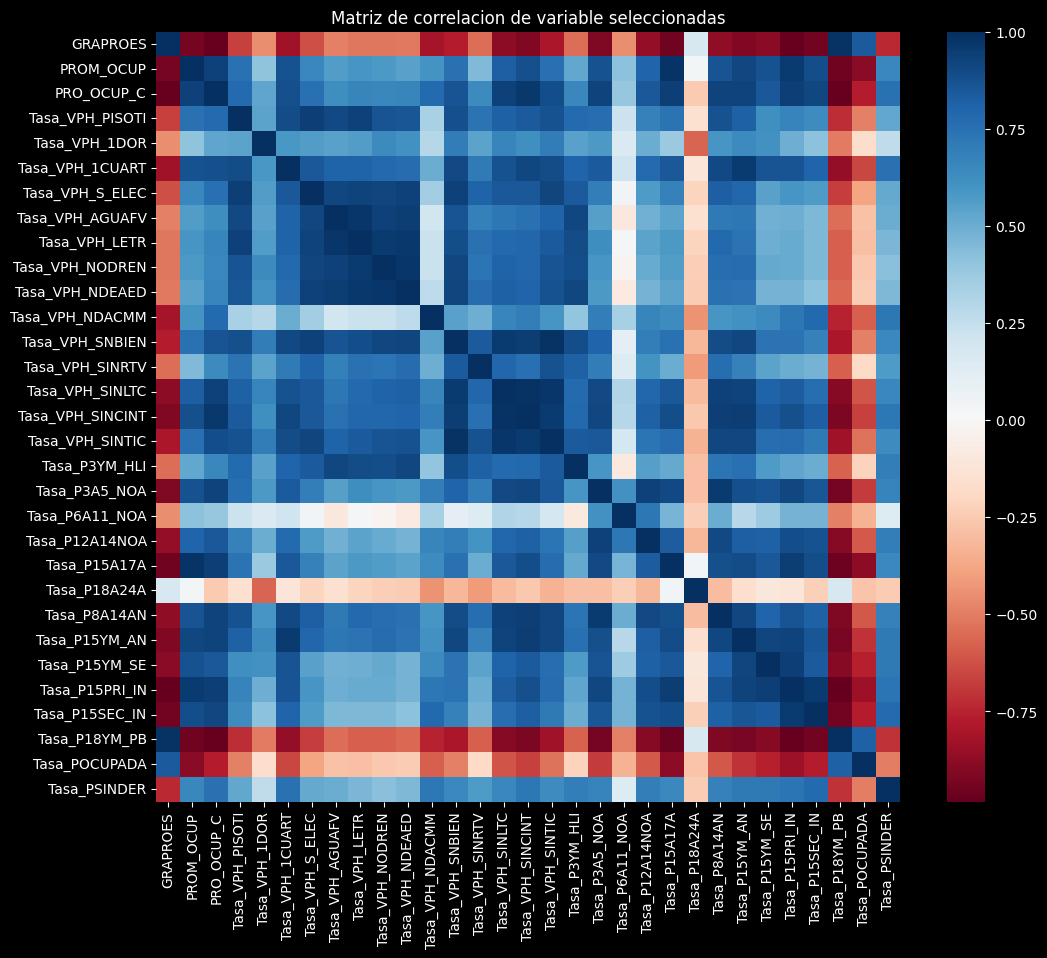

In [117]:
matriz_corr = df_ind[lst_pca].corr()
plt.figure(figsize=(12,10))
plt.title('Matriz de correlacion de variable seleccionadas')
sns.heatmap(matriz_corr, cmap='RdBu')
plt.show()

In [118]:
lst_pca = [ 'NOM_MUN','GRAPROES', 'PROM_OCUP',
           'PRO_OCUP_C','Tasa_VPH_PISOTI', 'Tasa_VPH_1DOR', 'Tasa_VPH_1CUART',
       'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV', 'Tasa_VPH_LETR',
       'Tasa_VPH_NODREN', 'Tasa_VPH_NDEAED', 'Tasa_VPH_NDACMM',
       'Tasa_VPH_SNBIEN', 'Tasa_VPH_SINRTV', 'Tasa_VPH_SINLTC',
       'Tasa_VPH_SINCINT', 'Tasa_VPH_SINTIC', 'Tasa_P3YM_HLI', 'Tasa_P3A5_NOA',
       'Tasa_P6A11_NOA', 'Tasa_P12A14NOA', 'Tasa_P15A17A', 
       'Tasa_P8A14AN', 'Tasa_P15YM_AN', 'Tasa_P15YM_SE', 'Tasa_P15PRI_IN',
       'Tasa_P15SEC_IN', 'Tasa_P18YM_PB', 'Tasa_POCUPADA', 'Tasa_PSINDER']


In [119]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components = 2)
)

In [120]:
df_ind[lst_pca]

,NOM_MUN,GRAPROES,PROM_OCUP,PRO_OCUP_C,Tasa_VPH_PISOTI,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_LETR,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_NDACMM,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SINTIC,Tasa_P3YM_HLI,Tasa_P3A5_NOA,Tasa_P6A11_NOA,Tasa_P12A14NOA,Tasa_P15A17A,Tasa_P8A14AN,Tasa_P15YM_AN,Tasa_P15YM_SE,Tasa_P15PRI_IN,Tasa_P15SEC_IN,Tasa_P18YM_PB,Tasa_POCUPADA,Tasa_PSINDER
52272,Total de la entidad Ciudad de México,11.48,3.32,0.8,0.005335,0.267915,0.045017,0.000631,0.009553,0.001639,0.001386,0.000058,0.456364,0.002035,0.015207,0.025450,0.184810,0.003467,0.013589,0.009851,0.003442,0.002596,0.033373,0.001286,0.011666,0.017642,0.030166,0.021264,0.490382,0.541314,0.271749
52275,Azcapotzalco,11.91,3.21,0.77,0.002236,0.252797,0.026027,0.000254,0.001600,0.000301,0.000582,0.000013,0.440498,0.001259,0.011119,0.019206,0.151873,0.002156,0.007422,0.007584,0.003413,0.002242,0.031881,0.000893,0.008503,0.011252,0.025134,0.017443,0.543288,0.538446,0.209091
52277,Coyoacán,12.51,3.2,0.7,0.002163,0.224114,0.038707,0.000293,0.000639,0.000245,0.000875,0.000010,0.374688,0.001288,0.013907,0.016854,0.129831,0.002130,0.012577,0.006077,0.002763,0.002023,0.031104,0.000897,0.009382,0.013160,0.023109,0.015647,0.589040,0.539589,0.261961
52279,Cuajimalpa de Morelos,11.44,3.6,0.81,0.008978,0.260819,0.045632,0.000471,0.004329,0.003053,0.002081,0.000000,0.388935,0.001458,0.013884,0.025444,0.181693,0.002734,0.009399,0.012004,0.004768,0.003073,0.036594,0.001599,0.011829,0.017695,0.032156,0.021926,0.453672,0.539116,0.242565
52306,Gustavo A. Madero,11.11,3.42,0.83,0.003959,0.282030,0.042620,0.000432,0.002039,0.000375,0.000805,0.000030,0.506469,0.002287,0.015606,0.031812,0.214852,0.004113,0.012099,0.010658,0.003245,0.002421,0.034412,0.001162,0.012438,0.021537,0.031989,0.020850,0.469249,0.514116,0.256447
52308,Iztacalco,11.52,3.43,0.82,0.002166,0.244886,0.037027,0.000399,0.000714,0.000169,0.000323,0.000023,0.469921,0.001506,0.012045,0.020480,0.167183,0.002474,0.010902,0.007749,0.002696,0.002016,0.033413,0.001033,0.009587,0.013294,0.027544,0.020215,0.512391,0.542149,0.272096
52310,Iztapalapa,10.42,3.61,0.92,0.005342,0.285387,0.063200,0.000558,0.002377,0.000696,0.000608,0.000035,0.541103,0.002790,0.017431,0.034954,0.247111,0.004630,0.015645,0.013175,0.003926,0.003177,0.036149,0.001670,0.014587,0.025289,0.037932,0.025423,0.404754,0.525178,0.324054
52312,La Magdalena Contreras,10.84,3.62,0.87,0.008638,0.286603,0.058439,0.001062,0.011210,0.001803,0.003229,0.000042,0.489245,0.002656,0.014383,0.028849,0.208163,0.004305,0.011671,0.009983,0.003324,0.002629,0.035203,0.001345,0.015075,0.021000,0.035716,0.027065,0.425568,0.522401,0.275016
52338,Milpa Alta,9.95,3.9,1.03,0.022912,0.313901,0.086652,0.003369,0.091627,0.018227,0.013498,0.000736,0.501729,0.006113,0.023671,0.059858,0.379961,0.008812,0.032033,0.014363,0.003262,0.003196,0.039925,0.002305,0.021083,0.023912,0.038779,0.025412,0.332587,0.537754,0.301464
52585,Álvaro Obregón,11.28,3.45,0.81,0.004883,0.279360,0.045886,0.000313,0.001766,0.000402,0.000932,0.000013,0.441356,0.001842,0.013213,0.024305,0.176442,0.003197,0.011186,0.009624,0.003947,0.002866,0.033654,0.001327,0.012851,0.019260,0.033334,0.022375,0.468282,0.544614,0.246780


In [121]:
df_pca = df_ind[lst_pca].copy().reset_index(drop = True)

In [122]:
df_pca.set_index(['NOM_MUN'], inplace = True)

In [123]:
df_pca = df_pca.drop(index ='Total de la entidad Ciudad de México')

In [124]:
df_pca

,GRAPROES,PROM_OCUP,PRO_OCUP_C,Tasa_VPH_PISOTI,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_LETR,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_NDACMM,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SINTIC,Tasa_P3YM_HLI,Tasa_P3A5_NOA,Tasa_P6A11_NOA,Tasa_P12A14NOA,Tasa_P15A17A,Tasa_P8A14AN,Tasa_P15YM_AN,Tasa_P15YM_SE,Tasa_P15PRI_IN,Tasa_P15SEC_IN,Tasa_P18YM_PB,Tasa_POCUPADA,Tasa_PSINDER
NOM_MUN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Azcapotzalco,11.91,3.21,0.77,0.002236,0.252797,0.026027,0.000254,0.001600,0.000301,0.000582,0.000013,0.440498,0.001259,0.011119,0.019206,0.151873,0.002156,0.007422,0.007584,0.003413,0.002242,0.031881,0.000893,0.008503,0.011252,0.025134,0.017443,0.543288,0.538446,0.209091
Coyoacán,12.51,3.2,0.7,0.002163,0.224114,0.038707,0.000293,0.000639,0.000245,0.000875,0.000010,0.374688,0.001288,0.013907,0.016854,0.129831,0.002130,0.012577,0.006077,0.002763,0.002023,0.031104,0.000897,0.009382,0.013160,0.023109,0.015647,0.589040,0.539589,0.261961
Cuajimalpa de Morelos,11.44,3.6,0.81,0.008978,0.260819,0.045632,0.000471,0.004329,0.003053,0.002081,0.000000,0.388935,0.001458,0.013884,0.025444,0.181693,0.002734,0.009399,0.012004,0.004768,0.003073,0.036594,0.001599,0.011829,0.017695,0.032156,0.021926,0.453672,0.539116,0.242565
Gustavo A. Madero,11.11,3.42,0.83,0.003959,0.282030,0.042620,0.000432,0.002039,0.000375,0.000805,0.000030,0.506469,0.002287,0.015606,0.031812,0.214852,0.004113,0.012099,0.010658,0.003245,0.002421,0.034412,0.001162,0.012438,0.021537,0.031989,0.020850,0.469249,0.514116,0.256447
Iztacalco,11.52,3.43,0.82,0.002166,0.244886,0.037027,0.000399,0.000714,0.000169,0.000323,0.000023,0.469921,0.001506,0.012045,0.020480,0.167183,0.002474,0.010902,0.007749,0.002696,0.002016,0.033413,0.001033,0.009587,0.013294,0.027544,0.020215,0.512391,0.542149,0.272096
Iztapalapa,10.42,3.61,0.92,0.005342,0.285387,0.063200,0.000558,0.002377,0.000696,0.000608,0.000035,0.541103,0.002790,0.017431,0.034954,0.247111,0.004630,0.015645,0.013175,0.003926,0.003177,0.036149,0.001670,0.014587,0.025289,0.037932,0.025423,0.404754,0.525178,0.324054
La Magdalena Contreras,10.84,3.62,0.87,0.008638,0.286603,0.058439,0.001062,0.011210,0.001803,0.003229,0.000042,0.489245,0.002656,0.014383,0.028849,0.208163,0.004305,0.011671,0.009983,0.003324,0.002629,0.035203,0.001345,0.015075,0.021000,0.035716,0.027065,0.425568,0.522401,0.275016
Milpa Alta,9.95,3.9,1.03,0.022912,0.313901,0.086652,0.003369,0.091627,0.018227,0.013498,0.000736,0.501729,0.006113,0.023671,0.059858,0.379961,0.008812,0.032033,0.014363,0.003262,0.003196,0.039925,0.002305,0.021083,0.023912,0.038779,0.025412,0.332587,0.537754,0.301464
Álvaro Obregón,11.28,3.45,0.81,0.004883,0.279360,0.045886,0.000313,0.001766,0.000402,0.000932,0.000013,0.441356,0.001842,0.013213,0.024305,0.176442,0.003197,0.011186,0.009624,0.003947,0.002866,0.033654,0.001327,0.012851,0.019260,0.033334,0.022375,0.468282,0.544614,0.246780


In [125]:
pipe.fit(df_pca)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [126]:
pca_df = pipe.fit_transform(df_pca)

In [127]:
indice = pca_df[:,0]

In [128]:
df_two_axis = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

In [129]:
df_pca['Indice_marginalidad'] = indice

In [130]:
df_pca.sort_values(by = 'Indice_marginalidad')

,GRAPROES,PROM_OCUP,PRO_OCUP_C,Tasa_VPH_PISOTI,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_LETR,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_NDACMM,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SINTIC,Tasa_P3YM_HLI,Tasa_P3A5_NOA,Tasa_P6A11_NOA,Tasa_P12A14NOA,Tasa_P15A17A,Tasa_P8A14AN,Tasa_P15YM_AN,Tasa_P15YM_SE,Tasa_P15PRI_IN,Tasa_P15SEC_IN,Tasa_P18YM_PB,Tasa_POCUPADA,Tasa_PSINDER,Indice_marginalidad
NOM_MUN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Benito Juárez,14.55,2.46,0.56,0.000645,0.271204,0.014966,0.000145,0.000215,0.000025,0.000165,0.000000,0.276290,0.000570,0.012170,0.005705,0.053192,0.000955,0.008154,0.004042,0.002676,0.001541,0.022112,0.000495,0.003110,0.004959,0.009658,0.007864,0.758640,0.624771,0.200844,-9.107110
Miguel Hidalgo,13.11,2.81,0.66,0.001356,0.267505,0.024335,0.000268,0.000648,0.000059,0.000767,0.000006,0.346951,0.001052,0.014620,0.014258,0.093864,0.002491,0.008669,0.006372,0.003108,0.001911,0.027025,0.000912,0.006268,0.008276,0.018194,0.014199,0.613953,0.578245,0.192315,-5.541270
Coyoacán,12.51,3.2,0.7,0.002163,0.224114,0.038707,0.000293,0.000639,0.000245,0.000875,0.000010,0.374688,0.001288,0.013907,0.016854,0.129831,0.002130,0.012577,0.006077,0.002763,0.002023,0.031104,0.000897,0.009382,0.013160,0.023109,0.015647,0.589040,0.539589,0.261961,-3.803911
Azcapotzalco,11.91,3.21,0.77,0.002236,0.252797,0.026027,0.000254,0.001600,0.000301,0.000582,0.000013,0.440498,0.001259,0.011119,0.019206,0.151873,0.002156,0.007422,0.007584,0.003413,0.002242,0.031881,0.000893,0.008503,0.011252,0.025134,0.017443,0.543288,0.538446,0.209091,-3.367239
Cuauhtémoc,12.41,2.75,0.72,0.001123,0.252047,0.027656,0.000360,0.000803,0.000118,0.000575,0.000009,0.505989,0.001505,0.018415,0.018091,0.137223,0.002773,0.016601,0.007960,0.003378,0.002506,0.027346,0.001000,0.008046,0.011132,0.022124,0.019125,0.579627,0.604852,0.281745,-3.134523
Iztacalco,11.52,3.43,0.82,0.002166,0.244886,0.037027,0.000399,0.000714,0.000169,0.000323,0.000023,0.469921,0.001506,0.012045,0.020480,0.167183,0.002474,0.010902,0.007749,0.002696,0.002016,0.033413,0.001033,0.009587,0.013294,0.027544,0.020215,0.512391,0.542149,0.272096,-2.106038
Venustiano Carranza,11.46,3.26,0.82,0.002263,0.255250,0.029617,0.000350,0.000495,0.000112,0.000429,0.000013,0.503051,0.001517,0.012503,0.025401,0.181963,0.002731,0.011203,0.008936,0.003791,0.002628,0.032231,0.001233,0.008914,0.011393,0.027437,0.022689,0.502409,0.544920,0.282084,-1.389416
Álvaro Obregón,11.28,3.45,0.81,0.004883,0.279360,0.045886,0.000313,0.001766,0.000402,0.000932,0.000013,0.441356,0.001842,0.013213,0.024305,0.176442,0.003197,0.011186,0.009624,0.003947,0.002866,0.033654,0.001327,0.012851,0.019260,0.033334,0.022375,0.468282,0.544614,0.246780,-0.075811
Cuajimalpa de Morelos,11.44,3.6,0.81,0.008978,0.260819,0.045632,0.000471,0.004329,0.003053,0.002081,0.000000,0.388935,0.001458,0.013884,0.025444,0.181693,0.002734,0.009399,0.012004,0.004768,0.003073,0.036594,0.001599,0.011829,0.017695,0.032156,0.021926,0.453672,0.539116,0.242565,0.452957


In [131]:
dfi = df_pca[['Indice_marginalidad']].copy()
mMs = MinMaxScaler()
dfi['Indice_marginalidad'] = mMs.fit_transform(dfi)

In [132]:
dfi = dfi.reset_index()

In [133]:
dfi

,NOM_MUN,Indice_marginalidad
0,Azcapotzalco,0.281333
1,Coyoacán,0.259930
2,Cuajimalpa de Morelos,0.468576
3,Gustavo A. Madero,0.474588
4,Iztacalco,0.343150
5,Iztapalapa,0.624180
6,La Magdalena Contreras,0.551074
7,Milpa Alta,1.000000
8,Álvaro Obregón,0.442659
9,Tláhuac,0.642413


In [134]:
df_two_axis['NOM_MUN'] = dfi['NOM_MUN']

In [135]:
df_two_axis

,PC1,PC2,NOM_MUN
0,-3.367239,-0.723579,Azcapotzalco
1,-3.803911,0.422974,Coyoacán
2,0.452957,-2.104511,Cuajimalpa de Morelos
3,0.575611,-1.372230,Gustavo A. Madero
4,-2.106038,-0.779060,Iztacalco
5,3.627650,-2.683370,Iztapalapa
6,2.136109,-1.315207,La Magdalena Contreras
7,11.295266,4.421403,Milpa Alta
8,-0.075811,-1.693047,Álvaro Obregón
9,3.999634,-1.081691,Tláhuac


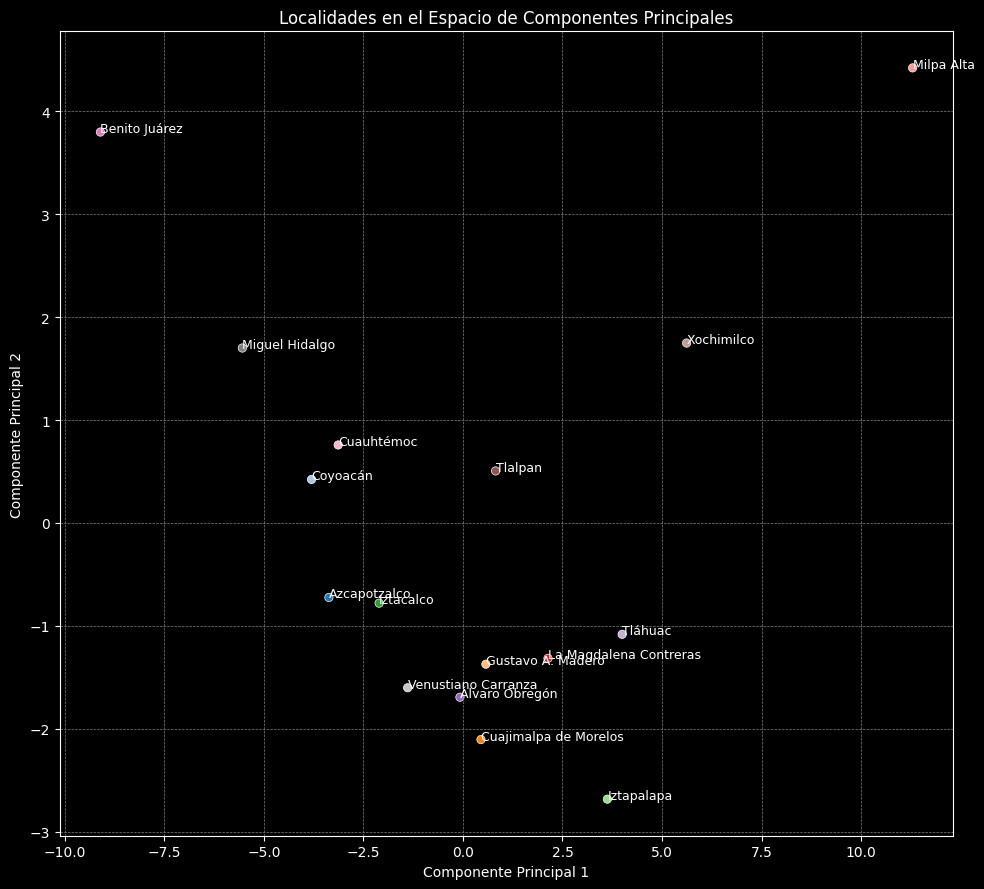

In [136]:
plt.style.use('dark_background')

plt.figure(figsize=(10,9))
sns.scatterplot(data = df_two_axis, x = 'PC1', y = 'PC2', hue = 'NOM_MUN', palette = 'tab20', legend = False )
for i in range(df_two_axis.shape[0]):
    plt.text(df_two_axis['PC1'].iloc[i], df_two_axis['PC2'].iloc[i], df_two_axis['NOM_MUN'].iloc[i], fontsize = 9,color='white')

plt.title('Localidades en el Espacio de Componentes Principales',color = 'white')
plt.xlabel('Componente Principal 1',color = 'white')
plt.ylabel('Componente Principal 2',color = 'white')
ax = plt.gca()
ax.tick_params(colors='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [137]:
pca_model = pipe.named_steps['pca']
pca_components = pd.DataFrame(
    pca_model.components_,
    columns=df_pca.drop(columns = ['Indice_marginalidad']).columns,   
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
).T

In [138]:
pca_components

,PC1,PC2
GRAPROES,-0.195949,0.185308
PROM_OCUP,0.192261,-0.151814
PRO_OCUP_C,0.206055,-0.098703
Tasa_VPH_PISOTI,0.187966,0.150450
Tasa_VPH_1DOR,0.133117,0.125169
Tasa_VPH_1CUART,0.203936,0.038592
Tasa_VPH_S_ELEC,0.183389,0.216649
Tasa_VPH_AGUAFV,0.164876,0.284456
Tasa_VPH_LETR,0.171965,0.270862
Tasa_VPH_NODREN,0.170303,0.277673


In [139]:
print((pca_components['PC1']).sort_values(ascending=False))

Tasa_VPH_SINCINT    0.211141
Tasa_P15YM_AN       0.208237
Tasa_P8A14AN        0.206805
Tasa_VPH_SINLTC     0.206759
PRO_OCUP_C          0.206055
Tasa_VPH_1CUART     0.203936
Tasa_VPH_SINTIC     0.203856
Tasa_VPH_SNBIEN     0.202119
Tasa_P3A5_NOA       0.199084
Tasa_P15PRI_IN      0.194300
Tasa_P15A17A        0.193135
PROM_OCUP           0.192261
Tasa_VPH_PISOTI     0.187966
Tasa_P15YM_SE       0.185803
Tasa_P15SEC_IN      0.183975
Tasa_P12A14NOA      0.183866
Tasa_VPH_S_ELEC     0.183389
Tasa_VPH_LETR       0.171965
Tasa_VPH_NODREN     0.170303
Tasa_P3YM_HLI       0.169847
Tasa_VPH_NDEAED     0.168571
Tasa_VPH_AGUAFV     0.164876
Tasa_VPH_SINRTV     0.162280
Tasa_PSINDER        0.158433
Tasa_VPH_NDACMM     0.141034
Tasa_VPH_1DOR       0.133117
Tasa_P6A11_NOA      0.072099
Tasa_POCUPADA      -0.145167
GRAPROES           -0.195949
Tasa_P18YM_PB      -0.201377
Name: PC1, dtype: float64


In [140]:
print((pca_components['PC2']).sort_values(ascending=False))

Tasa_VPH_NDEAED     0.295905
Tasa_VPH_AGUAFV     0.284456
Tasa_VPH_NODREN     0.277673
Tasa_VPH_LETR       0.270862
Tasa_POCUPADA       0.260375
Tasa_P3YM_HLI       0.248406
Tasa_VPH_S_ELEC     0.216649
GRAPROES            0.185308
Tasa_VPH_SINRTV     0.178685
Tasa_P18YM_PB       0.158123
Tasa_VPH_PISOTI     0.150450
Tasa_VPH_SNBIEN     0.146012
Tasa_VPH_1DOR       0.125169
Tasa_VPH_SINTIC     0.106529
Tasa_VPH_1CUART     0.038592
Tasa_VPH_SINLTC     0.029624
Tasa_VPH_SINCINT    0.007328
Tasa_P8A14AN       -0.012276
Tasa_P15YM_AN      -0.019720
Tasa_PSINDER       -0.079142
PRO_OCUP_C         -0.098703
Tasa_P3A5_NOA      -0.119207
Tasa_P15YM_SE      -0.145654
PROM_OCUP          -0.151814
Tasa_P12A14NOA     -0.158350
Tasa_P15A17A       -0.160442
Tasa_P15PRI_IN     -0.193942
Tasa_P15SEC_IN     -0.207981
Tasa_VPH_NDACMM    -0.217087
Tasa_P6A11_NOA     -0.293473
Name: PC2, dtype: float64


In [141]:
gdf = gpd.read_file('poligonos_alcaldias_cdmx.shp')
df_mer = dfi[['NOM_MUN','Indice_marginalidad']].copy()
gdf_mer = gdf.merge(df_mer,left_on = 'NOMGEO', right_on = 'NOM_MUN')

In [142]:
gdf_mer.sort_values(by = 'Indice_marginalidad')

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,NOM_MUN,Indice_marginalidad
12,09014,09,014,Benito Juárez,"POLYGON ((-99.14762 19.40401, -99.14681 19.403...",Benito Juárez,0.000000
14,09016,09,016,Miguel Hidalgo,"POLYGON ((-99.19045 19.47044, -99.19058 19.467...",Miguel Hidalgo,0.174776
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",Coyoacán,0.259930
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",Azcapotzalco,0.281333
13,09015,09,015,Cuauhtémoc,"POLYGON ((-99.12951 19.46265, -99.12919 19.462...",Cuauhtémoc,0.292740
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",Iztacalco,0.343150
15,09017,09,017,Venustiano Carranza,"POLYGON ((-99.10946 19.45292, -99.10895 19.452...",Venustiano Carranza,0.378274
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",Álvaro Obregón,0.442659
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",Cuajimalpa de Morelos,0.468576
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",Gustavo A. Madero,0.474588


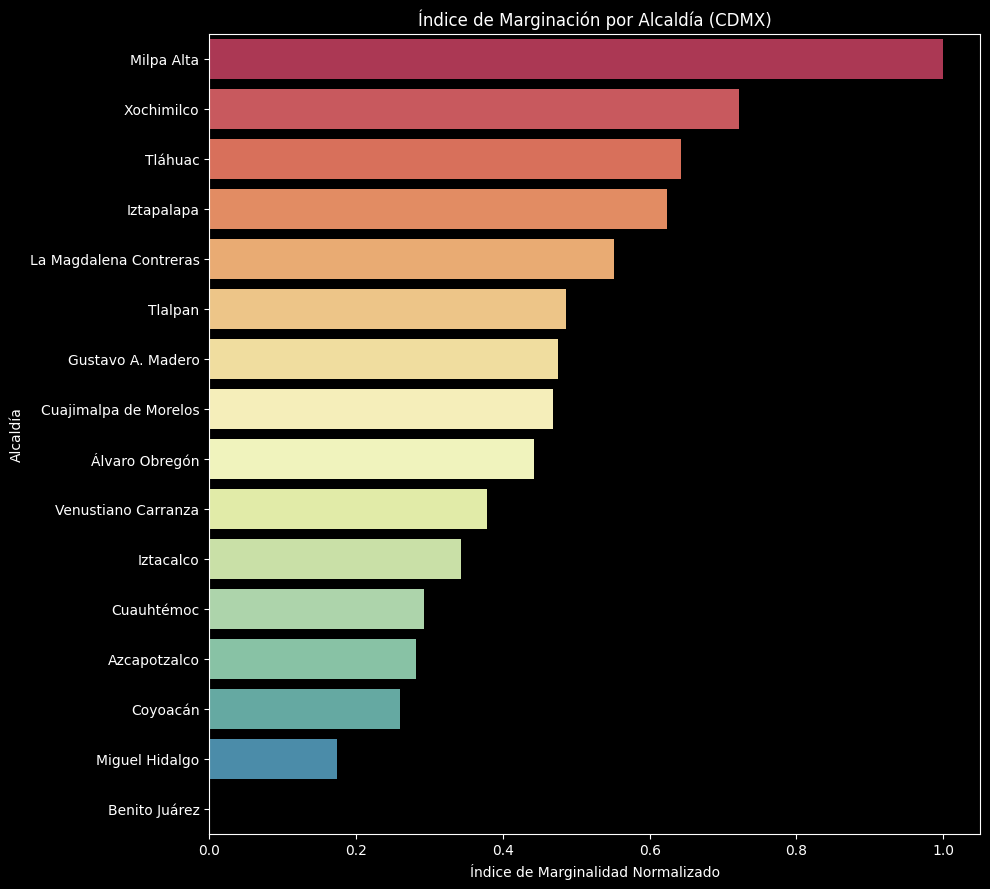

In [143]:
plt.figure(figsize = (10,9))
sns.barplot(data = dfi.sort_values(by = 'Indice_marginalidad', ascending= False), 
            x = 'Indice_marginalidad', 
            y = 'NOM_MUN',
            hue = 'NOM_MUN',
            palette = 'Spectral'
           )

plt.title('Índice de Marginación por Alcaldía (CDMX)')
plt.xlabel('Índice de Marginalidad Normalizado')
plt.ylabel('Alcaldía')
plt.tight_layout()
plt.show()



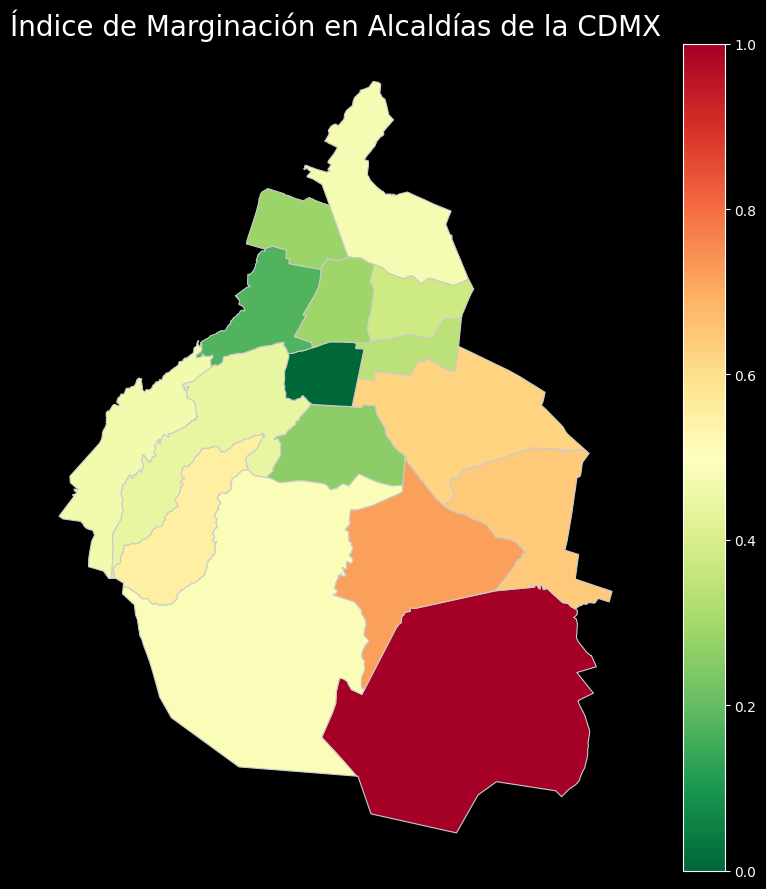

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
gdf_mer.plot(column='Indice_marginalidad',
                cmap='RdYlGn_r',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                norm  = colors.PowerNorm(gamma = 1)
                )
#RdBu_r
#RdYlGn_r
ax.set_title("Índice de Marginación en Alcaldías de la CDMX", fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.show()

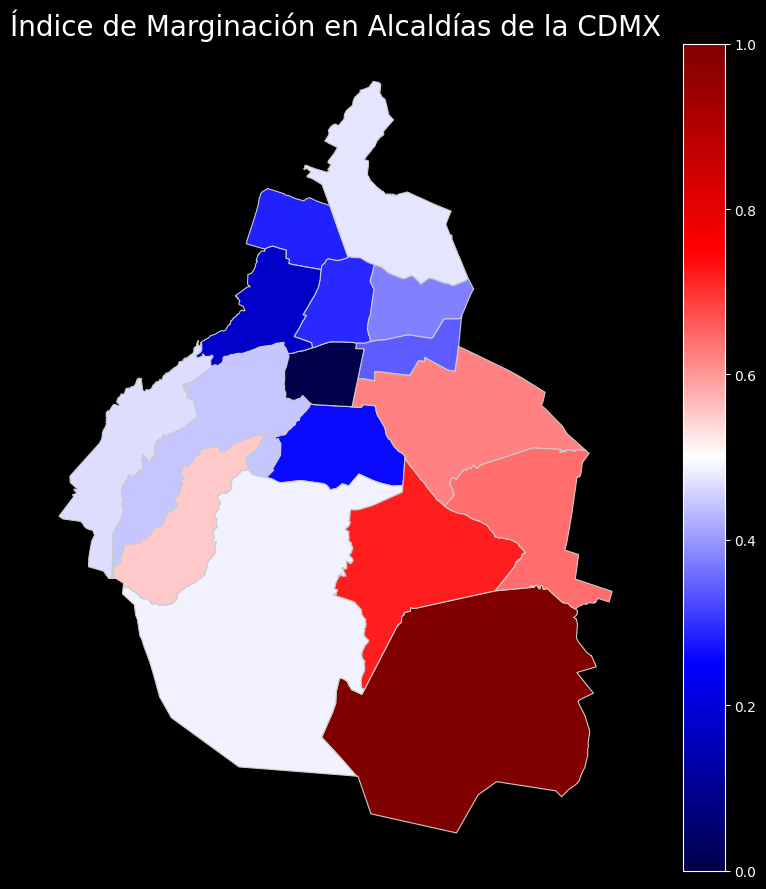

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
gdf_mer.plot(column='Indice_marginalidad',
                cmap='seismic',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                norm  = colors.PowerNorm(gamma = 1)
                )
#RdBu_r
#RdYlGn_r
ax.set_title("Índice de Marginación en Alcaldías de la CDMX", fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.show()